<a href="https://colab.research.google.com/github/akufanky/learnPython/blob/master/FankyAbdilqoyyim_Async2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama : Fanky Abdilqoyyim
- NIM : 210441100054
- Instansi : Universitas Trunojoyo

#**Sentiment Analysis**😢😊

##About Data

- Sentiment : label of dataset (Positive or Negative)
- Customer Review : Raw data of customer review
- corpus : Lowercase version of Customer Review

##Import Library

In [ ]:
import pandas as pd
import string, re

# Instalasi library Sastrawi untuk pemrosesan bahasa Indonesia
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Import library untuk melihat kemajuan iterasi
from tqdm import tqdm

# Import library untuk mengukur waktu eksekusi
from time import time

# Import library untuk mengakses Google Drive
from google.colab import drive

# Import library untuk membuat word cloud
from wordcloud import WordCloud

# Import library untuk visualisasi data
import matplotlib.pyplot as plt

# Import stopwords dari NLTK
from nltk.corpus import stopwords

# Import fungsi-fungsi untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# Import vectorizer untuk ekstraksi fitur teks
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Fungsi-fungsi ini digunakan untuk mengevaluasi kinerja model klasifikasi dengan menghitung akurasi dan mencetak laporan klasifikasi yang berisi precision, recall, dan f1-score.
from sklearn.metrics import accuracy_score, classification_report

# Import fungsi-fungsi untuk pembagian data
from sklearn.model_selection import train_test_split

# Import model SVM
from sklearn.svm import SVC

# Import model Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Import model Logistic Regression
from sklearn.linear_model import LogisticRegression

##Gathering Data

In [ ]:
# Mengaktifkan kemampuan tqdm untuk melacak kemajuan operasi Pandas
tqdm.pandas()

In [ ]:
# Mounting Google Drive agar dapat diakses dalam Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mendefinisikan path ke direktori di Google Drive di mana data disimpan
path = '/content/drive/MyDrive/Data/'

###Sentiment Data

In [ ]:
# Membaca file CSV menggunakan Pandas dari path yang telah ditentukan sebelumnya
df = pd.read_csv(path+'sample_data_async2ml.csv')

###Kamus Alay

In [ ]:
# Membaca kamus kata alay dan normalisasi kata dari file CSV
# Menggunakan encoding 'latin1' untuk menangani karakter khusus
# Memberikan nama kolom 'alay' dan 'normal' pada DataFrame slang_dict
slang_dict = pd.read_csv('/content/drive/MyDrive/Data/kamusalay.csv', encoding='latin1', names=['alay', 'normal'])

# Mengonversi DataFrame slang_dict menjadi dictionary dengan kolom 'alay' sebagai kunci dan kolom 'normal' sebagai nilai
slang_dict = dict(zip(slang_dict.alay.tolist(), slang_dict.normal.tolist()))

##Preprocessing

In [ ]:
# Menampilkan dimensi (jumlah baris dan kolom) dari DataFrame df
print(df.shape)
# Menampilkan lima baris pertama dari DataFrame df
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


In [ ]:
# Menampilkan informasi tentang DataFrame df, termasuk tipe data kolom dan jumlah nilai yang tidak kosong
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        1200 non-null   object
 1   Customer Review  1200 non-null   object
 2   corpus           1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


In [ ]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'Sentiment'
df['Sentiment'].value_counts()

Sentiment
Positive    600
Negative    600
Name: count, dtype: int64

In [ ]:
# Memfilter DataFrame df untuk menyimpan hanya baris yang memiliki lebih dari satu kata dalam kolom 'Customer Review'
# Ini bertujuan untuk menghilangkan baris yang hanya berisi satu kata
df = df[df['Customer Review'].str.split().str.len() > 1]

# Menampilkan dimensi (jumlah baris dan kolom) DataFrame df setelah proses filtering
print(df.shape)

# Menampilkan lima baris pertama dari DataFrame df setelah proses filtering
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


###Punctuation

In [ ]:
# Menghapus tanda baca dari kolom 'corpus' menggunakan str.translate() dan str.maketrans()
df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))

# Menampilkan dimensi (jumlah baris dan kolom) dari DataFrame df setelah menghapus tanda baca
print(df.shape)

# Menampilkan lima baris pertama dari DataFrame df setelah menghapus tanda baca
df.head()

(1182, 3)


<ipython-input-107-f9af8d49e9a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cpt
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


###Slangword

In [ ]:
#Membuat fungsi untuk memisahkan kata yang tidak perlu
def cvt_slang(sentence):
  return ''.join(' ').join(t for t in [slang_dict[x] if x in slang_dict.keys() else x for x in sentence.split()])

In [ ]:
# Menggunakan fungsi cvt_slang untuk mengaplikasikan normalisasi slang pada setiap baris dalam kolom 'corpus'
df['corpus'] = df.corpus.apply(cvt_slang)

# Menampilkan dimensi (jumlah baris dan kolom) dari DataFrame df setelah normalisasi slang
print(df.shape)

# Menampilkan lima baris pertama dari DataFrame df setelah normalisasi slang
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tetapi pemasangan sed...


In [ ]:
# Potongan program ini memuat file CSV dengan nama "kamusalay2.csv" yang berisi daftar kata alay dan normalisasi kata yang bersesuaian. Kemungkinan besar file ini akan digunakan untuk normalisasi kata-kata alay dalam analisis sentimen
data = pd.read_csv('/content/drive/MyDrive/Data/kamusalay2.csv')

In [ ]:
# Menggabungkan semua kata alay dari kolom 'alay' menjadi satu string
processed_text = ' '.join(data['alay'])

# Mengonversi string menjadi huruf kecil (lowercase)
processed_text = processed_text.lower()

In [ ]:
# Membuat word cloud dengan menggunakan WordCloud() dari library wordcloud
# Mengatur lebar, tinggi, dan warna latar belakang word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

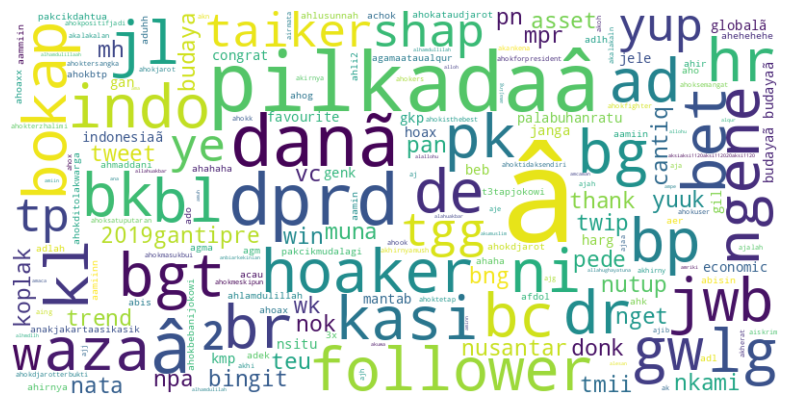

In [ ]:
# Membuat gambar berukuran 10x5 inci
plt.figure(figsize=(10, 5))

# Menampilkan word cloud menggunakan metode imshow() dari matplotlib
# Interpolasi 'bilinear' digunakan untuk membuat gambar lebih halus
plt.imshow(wordcloud, interpolation='bilinear')

# Menghilangkan sumbu x dan y
plt.axis('off')

# Menampilkan word cloud
plt.show()

###Repetition Character

In [ ]:
def repetition_char(txt):
    # Mencari substring dengan karakter yang berulang lebih dari dua kali secara berurutan dalam teks menggunakan regex
    sub_str = re.findall(r"((\w)\2{2,})", txt)

    # Untuk setiap substring yang ditemukan, mengganti semua kemunculan substring tersebut dengan hanya satu kemunculan karakter tersebut
    for x in sub_str:
        txt = txt.replace(x[0], x[1])

    # Mengembalikan teks yang telah diubah
    return txt

In [ ]:
# Menggunakan fungsi repetition_char untuk mengaplikasikan normalisasi karakter berulang pada setiap baris dalam kolom 'corpus'
df['corpus'] = df.corpus.apply(repetition_char)

# Mereset indeks DataFrame agar dimulai dari 0
df = df.reset_index(drop=True)

# Menampilkan dimensi (jumlah baris dan kolom) DataFrame df setelah pemrosesan
print(df.shape)

# Menampilkan lima baris pertama dari DataFrame df setelah pemrosesan
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tetapi pemasangan sed...


In [ ]:
# Menyimpan DataFrame df ke dalam file CSV dengan nama "data_bersih_async2ml.csv" tanpa menyertakan indeks
df.to_csv('/content/drive/MyDrive/Data/data_bersih_async2ml.csv', index=False)

In [ ]:
# Memuat file CSV "data_bersih_async2ml.csv" ke dalam DataFrame df
df = pd.read_csv(path+'data_bersih_async2ml.csv')

# Menampilkan dimensi (jumlah baris dan kolom) DataFrame df setelah dimuat
print(df.shape)

# Menampilkan lima baris pertama dari DataFrame df
df.head()

(1182, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...",barang bagus pengiriman juga cepat cuma minus ...
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt",bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original suplemen bagus tanpa efek...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tetapi pemasangan sed...


In [ ]:
# Menggunakan metode isnull() untuk mengidentifikasi nilai null dalam setiap sel DataFrame df
# Kemudian menggunakan metode sum() untuk menjumlahkan jumlah nilai null dalam setiap kolom
df.isnull().sum()

Sentiment          0
Customer Review    0
corpus             0
dtype: int64

##Modeling

In [ ]:
# Menginisialisasi variabel x dengan kolom 'corpus' dari DataFrame df
# Variabel x akan berisi teks atau data yang akan digunakan sebagai fitur dalam analisis sentimen
x = df.corpus

# Menginisialisasi variabel y dengan kolom 'Sentiment' dari DataFrame df
# Variabel y akan berisi label sentimen yang akan diprediksi oleh model
y = df.Sentiment

In [ ]:
# Inisialisasi objek TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan transformasi teks dalam variabel x menjadi representasi TF-IDF
X = vectorizer.fit_transform(x)

In [ ]:
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 70:30
# Variabel X adalah fitur yang sudah diubah menjadi representasi TF-IDF
# Variabel y adalah label sentimen
# test_size=0.3 menentukan bahwa 30% dari data akan digunakan sebagai data uji
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Menampilkan ukuran data latih (train) dan data uji (test)
print("Ukuran data latih:", x_train.shape)
print("Ukuran data uji:", x_test.shape)

Ukuran data latih: (827, 3361)
Ukuran data uji: (355, 3361)


###SVM (Support Vector Machine)

In [ ]:
# Memulai penghitungan waktu
st = time()

# Inisialisasi model Support Vector Machine (SVM)
model = SVC()

# Melatih model menggunakan data latih
model.fit(x_train, y_train)

# Mencetak pesan bahwa proses pelatihan telah selesai dan mencatat waktu yang diperlukan
print("[DONE] Proses pelatihan selesai:", time() - st, "detik\n")

# Melakukan prediksi pada data uji
y_pred = model.predict(x_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Mencetak akurasi model
print("Akurasi model: {:.2f}%\n".format(accuracy * 100))

# Mencetak laporan klasifikasi yang berisi precision, recall, dan f1-score
print(classification_report(y_test, y_pred))

# Mencetak matriks kebingungan (confusion matrix)
print(confusion_matrix(y_test, y_pred))

[DONE] Proses pelatihan selesai: 0.28063154220581055 detik

Akurasi model: 93.24%

              precision    recall  f1-score   support

    Negative       0.92      0.95      0.93       182
    Positive       0.94      0.92      0.93       173

    accuracy                           0.93       355
   macro avg       0.93      0.93      0.93       355
weighted avg       0.93      0.93      0.93       355

[[172  10]
 [ 14 159]]


###Naive Bayes

In [ ]:
# Inisialisasi model klasifikasi Naive Bayes dengan algoritma Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model menggunakan data latih
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Melakukan prediksi pada data uji menggunakan model klasifikasi Naive Bayes
y_pred = nb_classifier.predict(x_test)

In [ ]:
# Menghitung akurasi model dengan membandingkan label prediksi dengan label sebenarnya pada data uji
accuracy = accuracy_score(y_test, y_pred)

# Mencetak akurasi model dalam persen
print("Akurasi model: {:.2f}%\n".format(accuracy * 100))

# Mencetak laporan klasifikasi yang berisi precision, recall, dan f1-score untuk setiap kelas
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 90.42%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.86      0.90       182
    Positive       0.87      0.95      0.91       173

    accuracy                           0.90       355
   macro avg       0.91      0.91      0.90       355
weighted avg       0.91      0.90      0.90       355



##Visualization

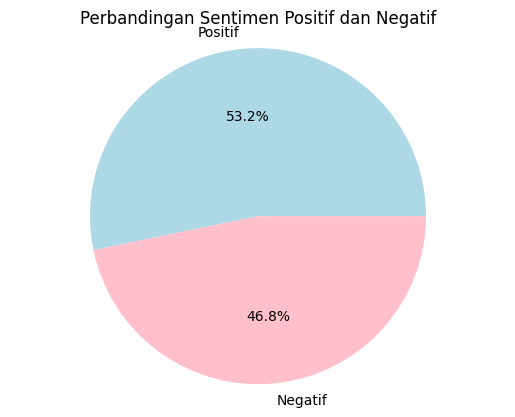

In [ ]:
# Hitung jumlah hasil positif dan negatif
positif_count = (y_pred == 'Positive').sum()
negatif_count = (y_pred == 'Negative').sum()

labels = ['Positif', 'Negatif']
jumlah = [positif_count, negatif_count]

# Buat Pie Chart
plt.pie(jumlah, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Perbandingan Sentimen Positif dan Negatif')
plt.axis('equal')
plt.show()

Dari hasil Modeling yang saya buat, diperoleh data Sentimen Positif sebanyak **53,2%** dan Sentimen Negatif sebanyak **46,8%**.
Saya menggunakan 2 model untuk menganalisa data tersebut untuk perbandingan modeling data saya sendiri, dan diperoleh Hasil Model SVM lebih baik daripada model Naive Bayes dengan perbandingan akurasi model **93.24% (SVM)**
dengan **90.42% (Naive Bayes)**.
Saya menggunakan Bar Chart untuk memperjelas perbandingan data antara sentimen Positif dan sentimen Negatif.